# INFO 2950 Phase II

Team: 
Carter Zhu (yz553)
Jase Rivera (jcr297)
Matthew Mentis-Cort (mam692)


## *Table of Contents*

## Research Questions

How does government expenditure on education influence long-term changes in GDP growth rates (as a measure of economic growth) and unemployment rates in developing (low-income and lower-middle-income) versus developed (upper-middle-income and high-income) countries?

## Introduction

This EDA uses data from the World Bank Group to explore economic trends across different countries from 1965 to 2023. The dataset includes key factors such as unemployment rates, GDP growth, and government expenditure on education. The goal of this analysis is to discover patterns and relationships that emphasize economic performance in the world.

In this EDA, our goal is to identify key patterns and trends related to global economic inequality and development. The analysis will show which countries have reduced unemployment and increased GDP growth, as well as if investments in education correspond to these outcomes.


## Data Description

**What are the observations (rows) and the attributes (columns)?**

Observations (Rows): Each row in the dataset corresponds to a country and a specific economic indicator (e.g., GDP growth, government expenditure on education, or unemployment) for mulitple years(1965-2023). The rows are structured with country-level data, showing trends and changes in economic indicators over time.

Attributes (Columns):
Country Name: The name of the country.
Country Code: A unique identifier for each country (ISO or similar).
Series Name: The economic indicator (e.g., GDP growth, unemployment, government expenditure on education).
Year Columns: Yearly data points from 1965 to 2023, where each column represents the recorded value of the economic indicator for that specific year.

**Why was this dataset created?**

The dataset was created to track economic performance and trends in different countries over time. The data helps governments, policymakers, economists, and international organizations understand key economic metrics such as GDP growth, government expenditure on education, and unemployment rates, which can guide economic development strategies and interventions in different regions of the world. 

**Who funded the creation of the dataset?**

The dataset was funded and crafted by The World Bank, a global financial institution that supports development efforts in countries world-wide. Its mission is to reduce poverty and promote sustainable development so the World Bank regularly collects and publishes data on a wide range of economic indicators to aid in policy-making and development planning.

**What processes might have influenced what data was observed and recorded and what was not?**

Data availability and reliability: Some countries may not have consistent or complete data records due to political instability, inadequate infrastructure, or limited data collection capabilities. This can lead to missing or incomplete data for certain years.

Selection of indicators: The choice of economic indicators included in the dataset (e.g., GDP growth, unemployment, government expenditure) reflects the focus areas of development agencies and governments. I believe these indicators chosen are deemed critical and essential for assessing economic health.

Reporting standards: Differences in national reporting standards and data collection methods could lead to variations in data quality and coverage.

Bias in data recording: Some data points may reflect self-reported figures from governments, which could be subject to political influence or reporting biases, particularly in countries where transparency or accurate reporting is less enforced.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The original data consisted of four datasets grouped by income level of the countries(low_income, lower_middle, upper_middle, high_income) to distinguish between developing and developed countries. Preprocessing was done to standardize economic indicators and ensure consistency across countries and years.

First, only the relevant economic indicators—GDP growth, government expenditure on education, and unemployment—were retained. Rows missing essential information like Country Name, Country Code, or Series Name were removed. Year columns from 1960 to 1964 were excluded due to data quality issue, and non-numeric values like ".." were replaced with NaN.

To handle missing values,linear interpolation was used to estimate missing data based on adjacent trends. Remaining NaN rows were dropped as there was too many missing data for linear interpolation to work well, and a new column, country_type, was added to label each country based on its income group. Finally, all datasets were merged into a single dataset for analysis.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Data collection for this type of dataset is typically done through government reporting mechanisms and international data collection efforts, not directly involving individuals. Governments or institutions contributing data likely understood that the information would be used for development assessments, economic planning, and research purposes. However, the individuals whose economic data are aggregated (e.g., unemployment figures) may not be aware of the specific data collection.


**Where can your raw source data be found, if applicable? Provide a link to the raw data.**

The four original dataset that we merged along with the final_dataset is in the google drive. we have also uploaded it to github.

https://drive.google.com/drive/folders/1Ka6LAx-YR8TA3QkG9799JndAbxd8Jlio?usp=sharing
https://databank.worldbank.org/source/world-development-indicators#


## Preregistration Statement 



**Hypothesis 1:** Higher government expenditure on education leads to higher GDP growth in both developing and developed countries, but the impact is greater in developing countries.

- **Null Hypothesis**: The effect of government expenditure on education on GDP growth does not differ significantly between developing and developed countries 

- **Alternative Hypothesis**: The effect of government expenditure on education on GDP growth is significantly greater in developing countries compared to developed countries 

**Context & Rationale:** 

Education is a well-established driver of economic growth because it builds human capital by enhancing individual's skill and productivity.For instance, in many developing countries, where access to quality education is limited, an increased in government spending on education can most definetely help bridge this gap in literacy and technical training, equipping more people to participate effectively in the labor force. Studies like Barro (1991) and Hanushek & Woessmann (2012) have shown that such investments lead to significant improvements in innovation and economic output, particularly in developing countries where baseline education levels are lower. For developing countries, increased government expenditure on education has the potential to address systemic deficits in human capital and creates significant improvements in economic output. Developed countries, on the other hand, may already have robust educational systems so it will result in smaller returns on additional expenditure. For example, in countries like India, government programs focused on primary and secondary education, such as the Sarva Shiksha Abhiyan (Education for All Movement), have contributed to higher school enrollment rates and long-term economic benefits. By contrast, in developed countries like Germany or the United States, where educational systems are already advanced and broadly accessible, additional spending on education often results in smaller marginal improvements, as the foundational infrastructure and access are already in place.

**Analysis Plan:**

To test this hypothesis, a multiple regression analysis will be conducted where the dependent variable is GDP growth (annual %), and the independent variables are government expenditure on education (total % of GDP) and income class. Income class will be represented as a binary variable (1 = developing countries; 0 = developed countries), and we will include an interaction term between government expenditure on education and income class. This setup allows us to test whether the effect of education expenditure on GDP growth differs significantly between developing and developed countries. We will test the significance of the interaction term using a two-tailed t-test, where a p-value <= 0.05 will indicate that the effect of education expenditure on GPD growth is significantly different between developing and developed countries. Additionally, we will evaluate the magnitude and the direction of the coefficient to confirm whether the effect is stronger in developing countries. 



**Hypothesis 2:** An increase in government expenditure on education reduces long-term unemployment rates more significantly in developing countries than in developed countries.

- **Null Hypothesis**: The interaction between government expenditure on education and income class does not have a significant effect on unemployment rates

- **Alternative Hypothesis**: The interaction between government expenditure on education and income class has a significant effect on unemployment rates, with a stronger reduction in unemployment rates in developing countries compared to developed countries 

**Context & Rationale:**

Education enhances employability by providing individuals with skills that meet the demands of the job market, a relationship consistently highlighted in labor economics research (OECD, 2010; Psacharopoulos & Patrinos, 2004). For example, in developing countries like Kenya, investments in technical and vocational education programs, such as the Youth Empowerment Project, have helped bridge skill gaps and prepared young people for roles in industries like construction and technology, significantly reducing unemployment among youth. While both developing and developed countries benefit from increased education spending, the impact is often greater in developing nations. This is because many developing countries face a shortage of trained workers, and education initiatives can directly address these gaps. By contrast, in developed countries like Japan, where educational attainment is already high, additional spending may lead to smaller improvements, as the workforce is already equipped with advanced skills and labor markets tend to be more efficient.


**Analysis Plan:** 

We will perform a multiple regression analysis where the dependent variable is the unemployment rate (total % of labor force, modeled ILO estimate). The independent variables will include government expenditure on education (total % of GDP), year (to capture long-term trends), and income class. Income class will be represented as a binary variable (1 = developing countries) [low and lower middle-income], 0 = developed countries [upper middle and high-income]). We will create a interaction terms between income class and education expenditure to model differential effects between these variables. For testing, we will focus on the coefficients of the interaction terms between education expenditure and income class. For each interaction term, a two-tailed t-test will be conducted to test whether its coefficient is significantly different from zero. A p-value <= 0.05 will mean there is a significant effect. Additionally, we will examine the magnitude and sign of these coefficients to determine whether education spending has a stronger nagtive effect on unemployment in developing countries(low and lower middle-income groups) compared to developed countries (upper middle and high-income groups).

To address the long term effect, we will access whether the interaction term remains signifcant acorss different years by including a three-way interaction (Education Expenditure x Income Class x Year). This will allow us to analyze whether the impact of education expenditure on unemployment changes over time and whether this change varies between developing and developed countries.






## Imports

In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Cleaning and Preprocessing

The data cleaning process involved multiple structured steps to ensure consistency, completeness, and proper formatting of the data for analysis. To address the research question, "How does government expenditure on education impact long-term economic growth and unemployment in developing versus developed countries?", the dataset was filtered to focus on three key variables. GDP growth (annual %) was selected as it serves as a fundamental measure of economic growth, reflecting the annual percentage increase in a country's economic output and providing insight into the broader economic impact of government policies. Government expenditure on education (total % of GDP) was included as it directly measures a country's investment in education relative to its economic output, capturing the priority placed on educational funding. Unemployment (total % of labor force, modeled ILO estimate) was chosen to assess labor market outcomes, particularly the effectiveness of economic and educational policies in addressing employment challenges.

Rows missing essential identifying information, such as Country Name, Country Code, or Series Name, were removed to maintain data integrity. Columns corresponding to the years 1960 to 1964 were excluded because they contained too many missing values to be useful. Non-numeric placeholders, such as .., were replaced with NaN to enable numeric operations, and the year columns were converted to a numeric format for consistency.

Linear interpolation was applied to estimate missing values based on trends in adjacent data points. This method was chosen because it preserves the temporal continuity of the dataset, ensures smooth transitions between known values, and minimizes the bias that other methods, such as mean imputation, could introduce. After interpolation, any remaining rows with NaN values were dropped to create a fully complete dataset. To enable comparison across countries, a new column, country_type, was added, categorizing countries based on their income classification (e.g., low_income, lower_middle, upper_middle, and high_income). Finally, the individual datasets were merged into a single, unified dataset. This thorough process ensured that the dataset was prepared for meaningful analysis, addressing gaps and inconsistencies while maintaining the integrity of the trends across key variables.


## Data Analysis

### A) Data Exploration and Visualization


We built a summary table to show statistics for each of our variables of interest, GDP growth, government expenditure, and unemployment. This gives us an idea of how many points we have in the dataset, and some of the extremes and summary statistics for each of our variables. The maxes for each variable are particularly interesting because it shows us that we have poential outliers to account for in the future (e.g. max unemployment percent of $82\%$).

The data shows significant variability in global economic indicators:

GDP growth averages 3.88%, with large fluctuations (std: 6.74)
Government expenditure on education averages 4.7% of GDP
Unemployment rate averages 6.04%, with wide variability (std: 6.26)

In [4]:
data=  pd.read_csv('final_cleaned_data.csv')

#specific economic indicators 
key_metrics = ['Unemployment, total (% of total labor force) (modeled ILO estimate)',
               'GDP growth (annual %)',
               'Government expenditure on education, total (% of GDP)']

#all the years we are analyzing 
years_columns = [f"{year} [YR{year}]" for year in range(1965, 2024)]


#reshape data so year becomes rows instead of columns
time_data_full = data[data['Series Name'].isin(key_metrics)].melt\
(id_vars=['Country Name', 'country_type', 'Series Name'], \
value_vars=years_columns, var_name='Year', value_name='Value')

summary_data = time_data_full[time_data_full['Series Name'].isin([
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of GDP)"
])]

summary_data_pivot = summary_data.pivot_table(index=\
                ['Country Name', 'Year', 'country_type'], \
                                        
                 columns='Series Name', values='Value').dropna()

summary_statistics = summary_data_pivot.describe()
#summary_data_pivot.head()
summary_statistics

Series Name,GDP growth (annual %),"Government expenditure on education, total (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,12331.000000,12331.000000,12331.000000
mean,3.888494,4.698497,6.042230
std,6.744425,5.162471,6.255983
min,-64.047107,-51.030865,-51.030865
25%,1.429953,2.677334,2.789146
50%,3.896714,4.431070,4.977000
75%,6.366926,6.275724,8.317796
max,153.492641,86.543820,81.887797


Because we are interested in the trends for each income group, we made some lineplots showing how GDP Growth, government expendiure, and unemployment change over time. Making these charts allows us to see commonalities between variables in various time periods. We can compare the trends of the lines between plots for different variables to see which ones have similar trends over time.

In [5]:
key_metrics = ['Unemployment, total (% of total labor force) (modeled ILO estimate)',
               'GDP growth (annual %)',
               'Government expenditure on education, total (% of GDP)']

years_columns = [f"{year} [YR{year}]" for year in range(1965, 2024)]
time_data_full = data[data['Series Name'].isin(key_metrics)].melt\
(id_vars=['Country Name', 'country_type', 'Series Name'],\
 value_vars=years_columns, var_name='Year', value_name='Value')

# Remove the "[YRXXXX]" part from the Year column
time_data_full['Year'] = time_data_full['Year'].str.extract(r'(\d{4})')

# Convert Year to numeric
time_data_full['Year'] = pd.to_numeric(time_data_full['Year'], errors='coerce')

# Check the updated DataFrame
print(time_data_full.head())
print(time_data_full.columns)

   Country Name country_type  \
0  Burkina Faso   low_income   
1  Burkina Faso   low_income   
2  Burkina Faso   low_income   
3       Burundi   low_income   
4       Burundi   low_income   

                                         Series Name  Year     Value  
0  Unemployment, total (% of total labor force) (...  1965  3.764545  
1                              GDP growth (annual %)  1965  3.764545  
2  Government expenditure on education, total (% ...  1965  3.764545  
3  Unemployment, total (% of total labor force) (...  1965  3.967226  
4                              GDP growth (annual %)  1965  3.967226  
Index(['Country Name', 'country_type', 'Series Name', 'Year', 'Value'], dtype='object')


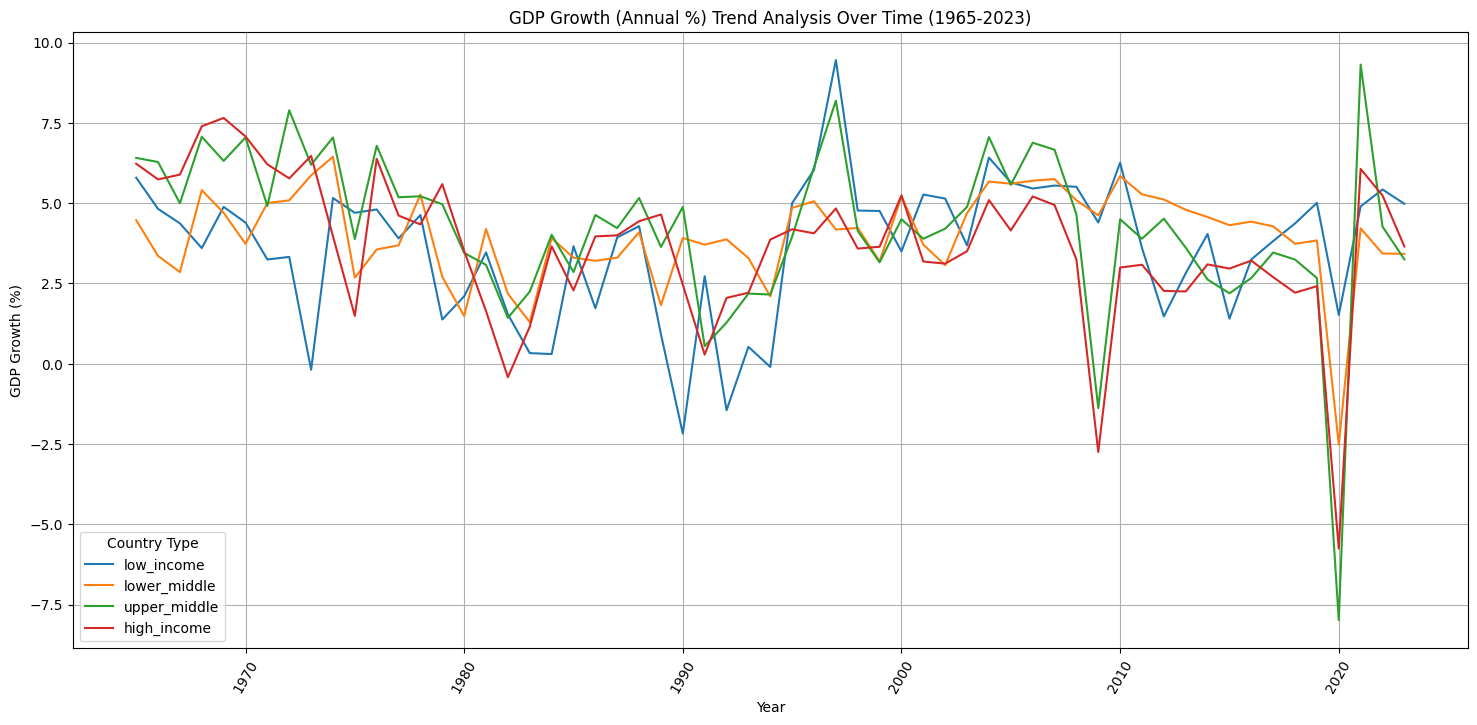

In [6]:
#GDP Growth (Annual %) Trend Analysis Over Time (1965-2023)

gdp_data = time_data_full[time_data_full['Series Name'] == "GDP growth (annual %)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=gdp_data, x="Year", y="Value", \
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("GDP Growth (Annual %) Trend Analysis Over Time (1965-2023)")
plt.ylabel("GDP Growth (%)")
plt.xlabel("Year")
plt.xticks(rotation =60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

The chart shows that while all countries experience cyclical economic growth, low-income countries are more vulnerable to economic instability and take longer to recover from economic downturns. In contrast, high-income and upper-middle-income countries tend to have more stable growth patterns, with faster recovery times from global emergencies. Major dips in 2008-2009 (financial crisis) and 2020 (COVID-19) affected all groups, but low-income nations were hit harder. Recently, there's a strong recovery across all country types, though the growth is not fully stabilized yet.


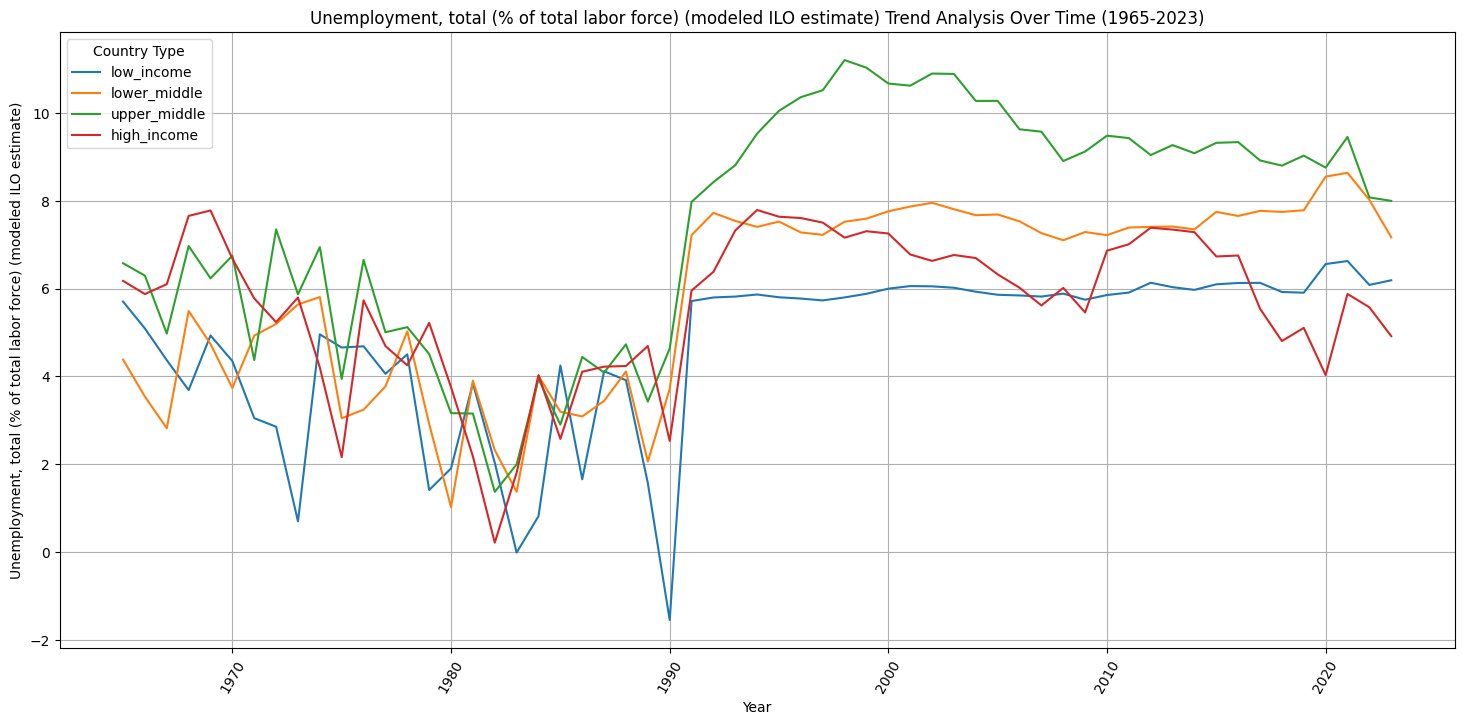

In [7]:
#Unemployment, total (% of total labor force) (modeled ILO estimate) Trend Analysis Over Time (1965-2023)

education_data_full = time_data_full[time_data_full['Series Name'] \
== "Unemployment, total (% of total labor force) (modeled ILO estimate)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=education_data_full, x="Year", y="Value", \
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("Unemployment, total (% of total labor force) \
(modeled ILO estimate) Trend Analysis Over Time (1965-2023)")
plt.ylabel("Unemployment, total (% of total labor force) (modeled ILO estimate)")
plt.xlabel("Year")
plt.xticks(rotation = 60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

This chart shows differences in how unemployment rates are across country income levels; upper-middle-income countries show continuous issues in the labor market. High-income countries recover more quickly after global recessions, while low-income countries exhibit more stability in unemployment rates, although it is possible that this could be due to data limitations or a high level of informal employment. Furthermore, high-income countries consistently having the lowest unemployment, while upper-middle-income countries experienced a significant spike around the 1990s but have since improved. The data also highlights the global impact of events like the 1980s recession, the 2008 financial crisis, and the 2020 pandemic.


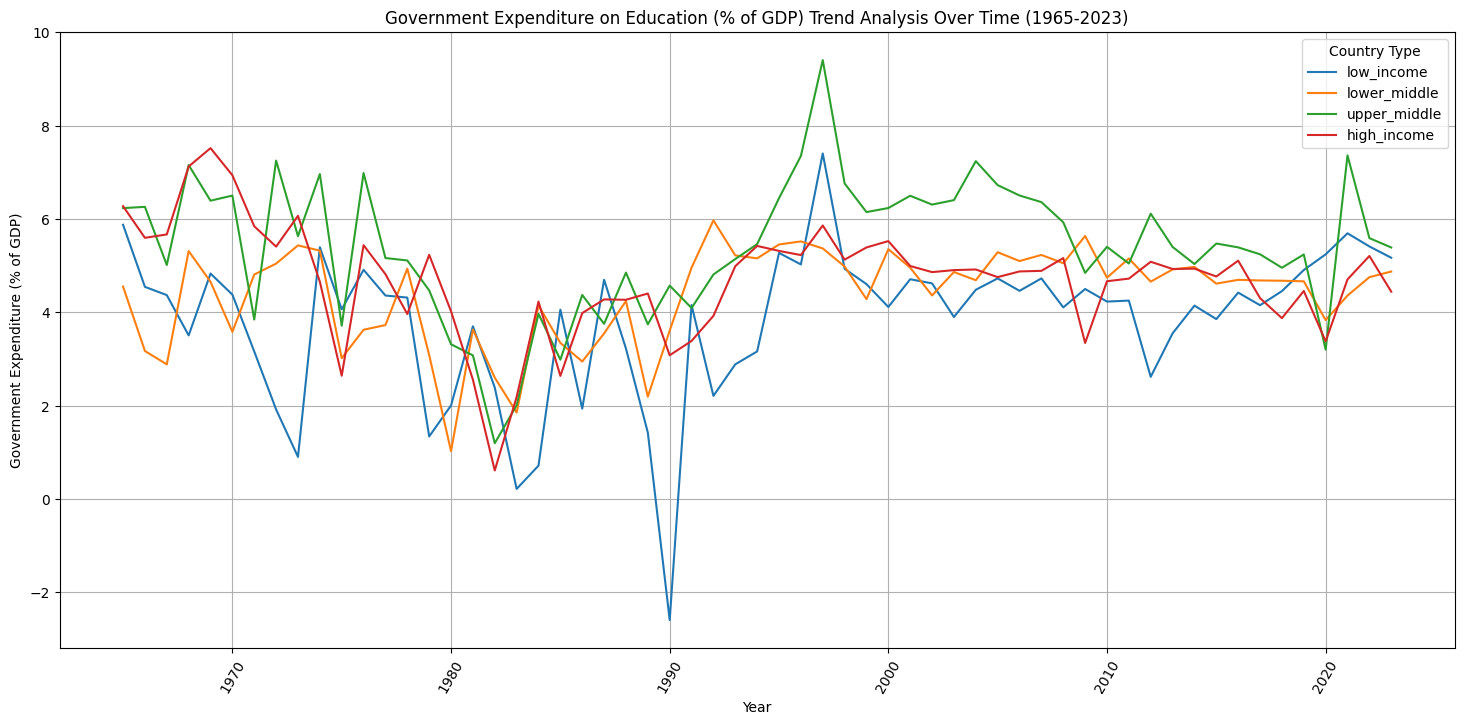

In [8]:
#Government Expenditure on Education (% of GDP) Trend Analysis Over Time (1965-2023)

education_data_full = time_data_full[time_data_full['Series Name'] \
== "Government expenditure on education, total (% of GDP)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=education_data_full, x="Year", y="Value",\
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("Government Expenditure on Education (% of GDP) \
Trend Analysis Over Time (1965-2023)")
plt.ylabel("Government Expenditure (% of GDP)")
plt.xlabel("Year")
plt.xticks(rotation = 60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

Upper-middle-income countries consistently spend the **most on education**, especially after the 1990s. High- and lower-middle-income countries have **stable spending** between **4-6%** of GDP. Low-income countries show **more volatility** with sharp drops in the 1990s but recovery afterward.

We also want to observe the correlation between variables to examine which variables may have a relationship. From the correlation heat map below, we observe that GDP growth and government expenditure and government expenditure and unemployment have higher than 0.7 correlation coefficients, suggesting that they effect each other in a real life for the areas in our dataset.

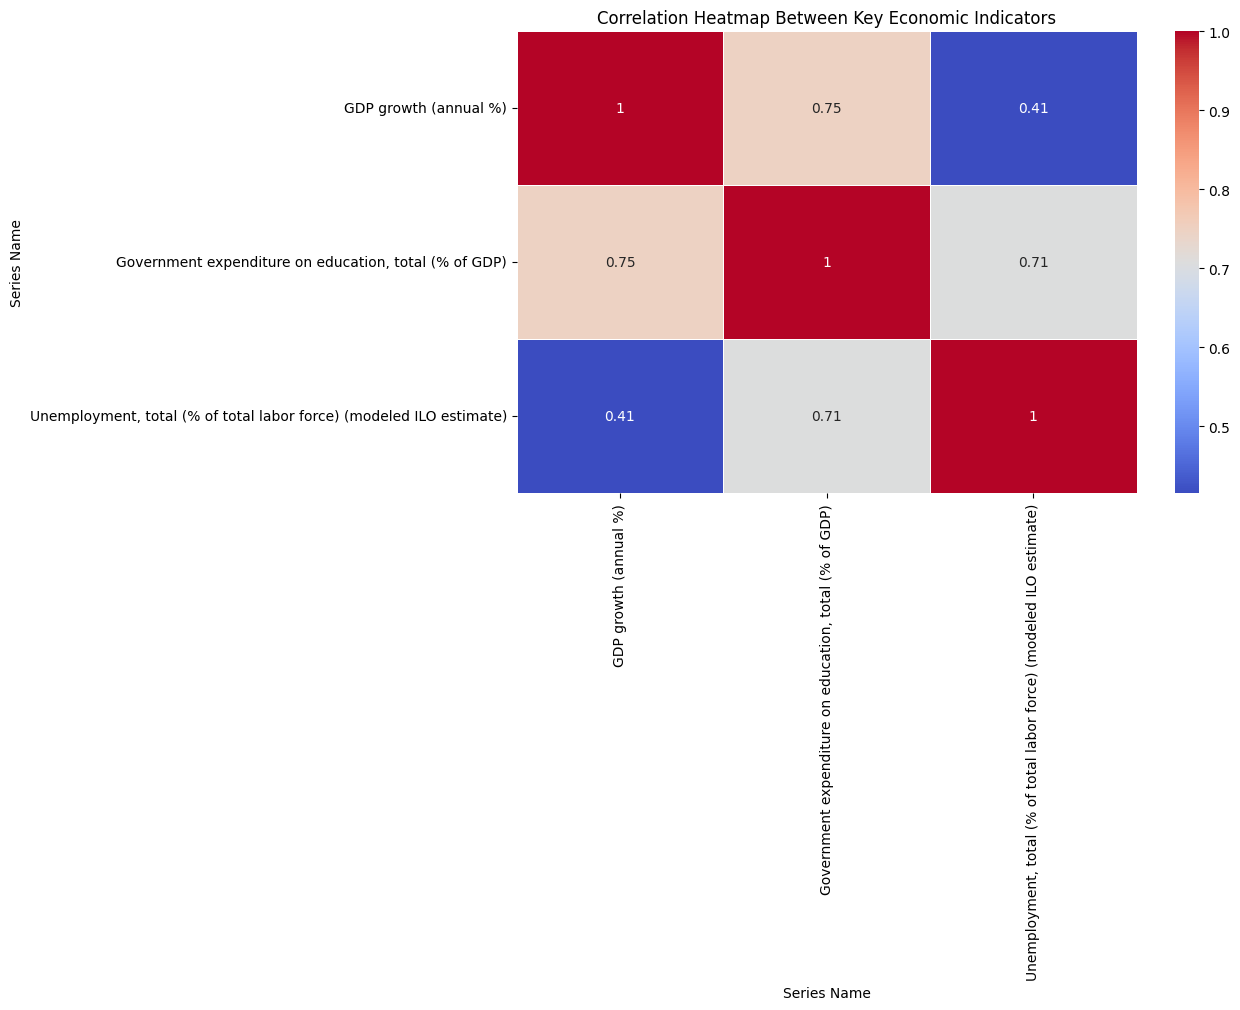

In [9]:
#Correlation Heatmap Between Key Economic Indicators

corr_data = time_data_full[time_data_full['Series Name'].isin([
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of GDP)"
])]
corr_data_pivot = corr_data.pivot_table(index=['Country Name',\
            'Year', 'country_type'], columns='Series Name', values='Value')
correlation_matrix = corr_data_pivot.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Between Key Economic Indicators")
plt.show()


The heatmap shows strong positive correlations between GDP growth and education spending (0.75), and a strong negative correlation between education spending and unemployment (0.71). There’s also a moderate negative correlation between GDP growth and unemployment (0.41). This suggests a very interesting insight: higher education spending is linked to both higher growth and lower unemployment.

It reveals the relationships between economic growth, education investment, and labor market outcomes. While education spending correlates positively with both GDP growth and unemployment, the long-term benefits of the investments mae take more time to materialize, specifically in improving labor market conditions. Countries experiencing fast GDP growth may also face a temporary increase in unemployment becuase of shifts in labor demand, especially during periods of economic change or technological advancement.

### B) Models and Hypothesis Testing


In [11]:
#Hypothesis 1 GDP growth

gdp_model_data = time_data_full[time_data_full["Series Name"].isin(
    ["GDP growth (annual %)", "Government expenditure on education, total (% of GDP)"]
)]

# Pivot the data to make 'GDP growth' and 'Education expenditure' columns
gdp_model_data = gdp_model_data.pivot_table(
    index=["Country Name", "Year", "country_type"],
    columns="Series Name",
    values="Value"
).reset_index()


gdp_model_data = gdp_model_data.rename(
    columns={
        "GDP growth (annual %)": "gdp_growth",
        "Government expenditure on education, total (% of GDP)": "education_expenditure"
    }
)

# Encode country type
gdp_model_data["country_type_encoded"] = gdp_model_data["country_type"].map({"low_income": 1, "lower_middle": 1, "upper_middle": 0, "high_income": 0})

# Add interaction term (country type x education expenditure )
#captures whether the effect of education expenditure on GDP growth
# differs between developing and developed countries.
gdp_model_data["interaction"] = gdp_model_data["country_type_encoded"] * gdp_model_data["education_expenditure"]

# Drop rows with missing values
gdp_model_data = gdp_model_data.dropna(subset=["gdp_growth", "education_expenditure", "country_type_encoded", "interaction"])


gdp_model_data["gdp_growth"] = pd.to_numeric(gdp_model_data["gdp_growth"], errors="coerce")
gdp_model_data["education_expenditure"] = pd.to_numeric(gdp_model_data["education_expenditure"], errors="coerce")
gdp_model_data["interaction"] = pd.to_numeric(gdp_model_data["interaction"], errors="coerce")

#
#X_gdp: Independent variables:

#Value_education: Education expenditure.
#country_type_encoded: Country type (developing vs. developed).
#interaction: Interaction term for country type and education expenditure.
#sm.add_constant(X_gdp): Adds a constant (intercept) term to the regression.
#y_gdp: Dependent variable (Value_gdp or GDP growth).
# Run regression
if not gdp_model_data.empty:
    X_gdp = gdp_model_data[["education_expenditure", "country_type_encoded", "interaction"]]
    y_gdp = gdp_model_data["gdp_growth"]
    X_gdp = sm.add_constant(X_gdp)

    gdp_model = sm.OLS(y_gdp, X_gdp).fit()
    print("\nGDP Growth Regression:\n", gdp_model.summary())
else:
    print("No valid data for GDP regression.")




GDP Growth Regression:
                             OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     5246.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:04:24   Log-Likelihood:                -35960.
No. Observations:               12331   AIC:                         7.193e+04
Df Residuals:                   12327   BIC:                         7.196e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const

## GDP Growth Trends 
The analysis of GDP growth trends involves compares countries of different socioeconomic status from 1965 to 2023. The results indicate that all country types experienced similar GDP growth patterns, largely influenced by significant global events, such as the 2008 financial crisis and the COVID-19 pandemic in 2020. A significant finding here is a spike in GDP growth in 2021, specifically for upper-middle-income countries, which likely reflects economic recovery after the pandemic. The regression analysis showed that high-income and upper-middle-income countries tend to recover quicker from economic downturns, whereas developing countries face more significant challenges in achieving similar stability. This suggests that the economic stability in high-income regions is better equipped to handle global crisises.

In [12]:
#Hypothesis 2 Unemployment 
import statsmodels.api as sm

unemployment_data = time_data_full[time_data_full["Series Name"].isin(
    ["Unemployment, total (% of total labor force) (modeled ILO estimate)", "Government expenditure on education, total (% of GDP)"]
)]

# Pivot the data to make 'Unemployment' and 'Education expenditure' columns
unemployment_model_data = unemployment_data.pivot_table(
    index=["Country Name", "Year", "country_type"],
    columns="Series Name",
    values="Value"
).reset_index()


unemployment_model_data = unemployment_model_data.rename(
    columns={
        "Unemployment, total (% of total labor force) (modeled ILO estimate)": "unemployment",
        "Government expenditure on education, total (% of GDP)": "education_expenditure"
    }
)

# Encode country type
unemployment_model_data["country_type_encoded"] = unemployment_model_data["country_type"].map({"low_income": 1, "lower_middle": 1, "upper_middle": 0, "high_income": 0})

# Add interaction term (between countrytype and education expenditure)
unemployment_model_data["interaction"] = unemployment_model_data["country_type_encoded"] * unemployment_model_data["education_expenditure"]

# Add a three-way interaction term to capture the long-term effect over years
unemployment_model_data["three_way_interaction"] = unemployment_model_data["interaction"] * unemployment_model_data["Year"]


unemployment_model_data = unemployment_model_data.dropna(subset=["unemployment", "education_expenditure", "country_type_encoded", "interaction", "three_way_interaction"])

#niumeirc
unemployment_model_data["unemployment"] = pd.to_numeric(unemployment_model_data["unemployment"], errors="coerce")
unemployment_model_data["education_expenditure"] = pd.to_numeric(unemployment_model_data["education_expenditure"], errors="coerce")
unemployment_model_data["interaction"] = pd.to_numeric(unemployment_model_data["interaction"], errors="coerce")
unemployment_model_data["three_way_interaction"] = pd.to_numeric(unemployment_model_data["three_way_interaction"], errors="coerce")

# Run regression
if not unemployment_model_data.empty:
    X_unemployment = unemployment_model_data[["education_expenditure", "country_type_encoded", "interaction", "Year", "three_way_interaction"]]
    y_unemployment = unemployment_model_data["unemployment"]
    X_unemployment = sm.add_constant(X_unemployment)

    unemployment_model = sm.OLS(y_unemployment, X_unemployment).fit()
    print("\nUnemployment Regression:\n", unemployment_model.summary())
else:
    print("No valid data for unemployment regression.")



Unemployment Regression:
                             OLS Regression Results                            
Dep. Variable:           unemployment   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2713.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:05:15   Log-Likelihood:                -35530.
No. Observations:               12331   AIC:                         7.107e+04
Df Residuals:                   12325   BIC:                         7.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
con

## Unemployment Trends
The unemployment trends from 1965 to 2023 show that upper-middle-income countries generally had higher unemployment rates after 1990, while high-income countries maintained relatively stable/lower unemployment rates. There is a noticeable increase in unemployment for upper-middle-income countries after 2000, which could suggest disruptions in the labor market or economic instability. In contrast, low-income countries show significant variability, reflecting the instability of their labor markets. Overall, the trends suggest that high-income countries are more consistent in handling unemployment.

## Significance Testing

In [21]:
#Determine statistical significance of observed data.
#Interpret findings and conclude whether to reject or fail to reject hypotheses
#outlined in preregistration statements.

## Conclusion / Interpretaion

Summarize your answers to your opening research questions.

## Data Limitations

* Missing Data: Some countries have incomplete data for certain years due to gaps in reporting, which may result in missing or estimated values that do not fully reflect actual conditions.
* Bias in Self-Reporting: Data from governments may be subject to reporting biases, especially in politically sensitive areas such as unemployment or economic growth. For example, some participants may not fill out the information accurately. 
* Limited Detail: The dataset contains national-level data, which may overlook regional disparities within countries.
* Interpolation: Filling in missing data using interpolation may introduce trends that do not accurately reflect economic realities.

## Resources

Dataset: https://databank.worldbank.org/source/world-development-indicators#

Data Manipulation Technique: https://www.geeksforgeeks.org/interpolation-in-python/